In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
grayimg=cv2.imread('grayimage.jpeg',cv2.COLOR_BGR2GRAY)
img1=cv2.imread('wallpaper.jpeg')
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2=cv2.imread('Screenshot (861).png')
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
noisyimg=cv2.imread('noisyimg.png',cv2.COLOR_BGR2GRAY)

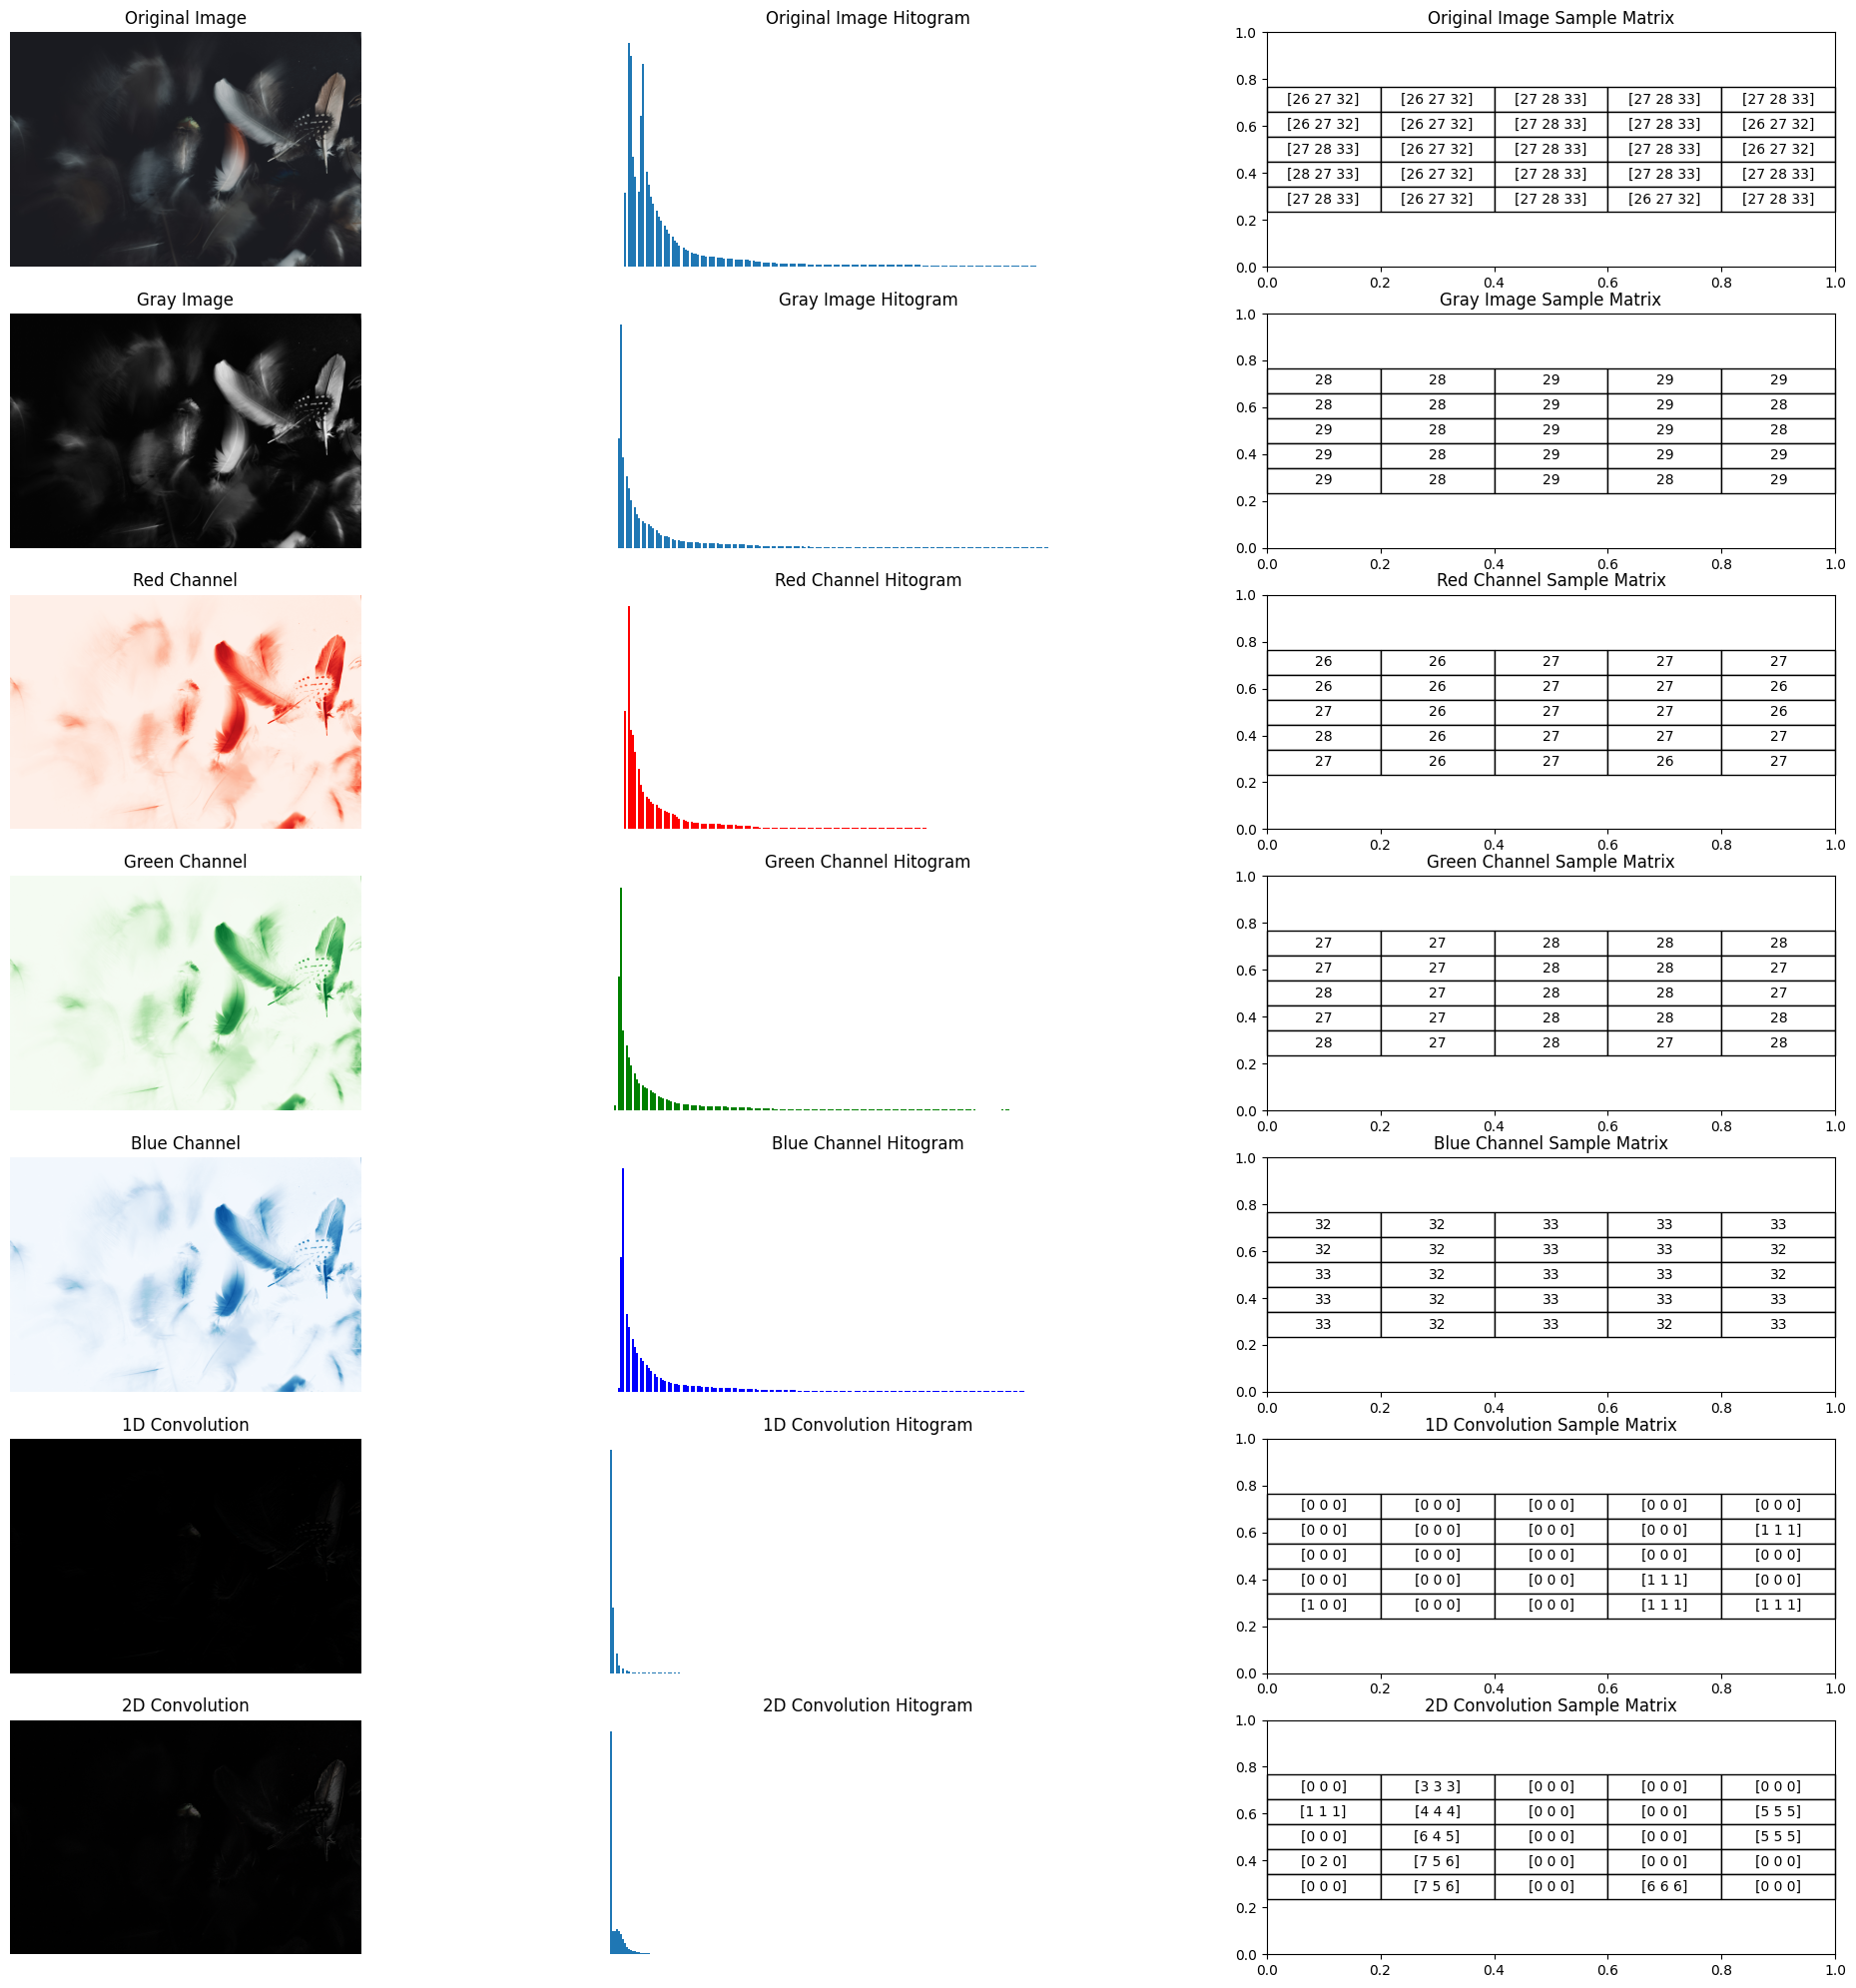

In [3]:
kernel1d=np.array([1,0,-1])
kernel2d=np.array([[1,1,1],[1,-8,1],[1,1,1]])
conv1d=cv2.filter2D(img1,-1,kernel1d)
conv2d=cv2.filter2D(img1,-1,kernel2d)
r,g,b=cv2.split(img1)
grayimage=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
images=[img1,grayimage,r,g,b,conv1d,conv2d]
titles=['Original Image','Gray Image','Red Channel','Green Channel','Blue Channel','1D Convolution','2D Convolution']
cmaps=[None,'gray','Reds','Greens','Blues','gray','gray']
hcols=[None,None,'red','green','blue',None,None]
plt.figure(figsize=(25,25))
for i,(image,title,cmap,hcol) in enumerate(zip(images,titles,cmaps,hcols)):
    plt.subplot(7,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    if cmap!=None:
        plt.imshow(image,cmap=cmap)
    else:
        plt.imshow(image)
    plt.subplot(7,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    if hcol==None:
        plt.hist(image.ravel(),bins=256)
    else:
        plt.hist(image.ravel(),bins=256,color=hcol)
    matrix=image[:5,:5]
    plt.subplot(7,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

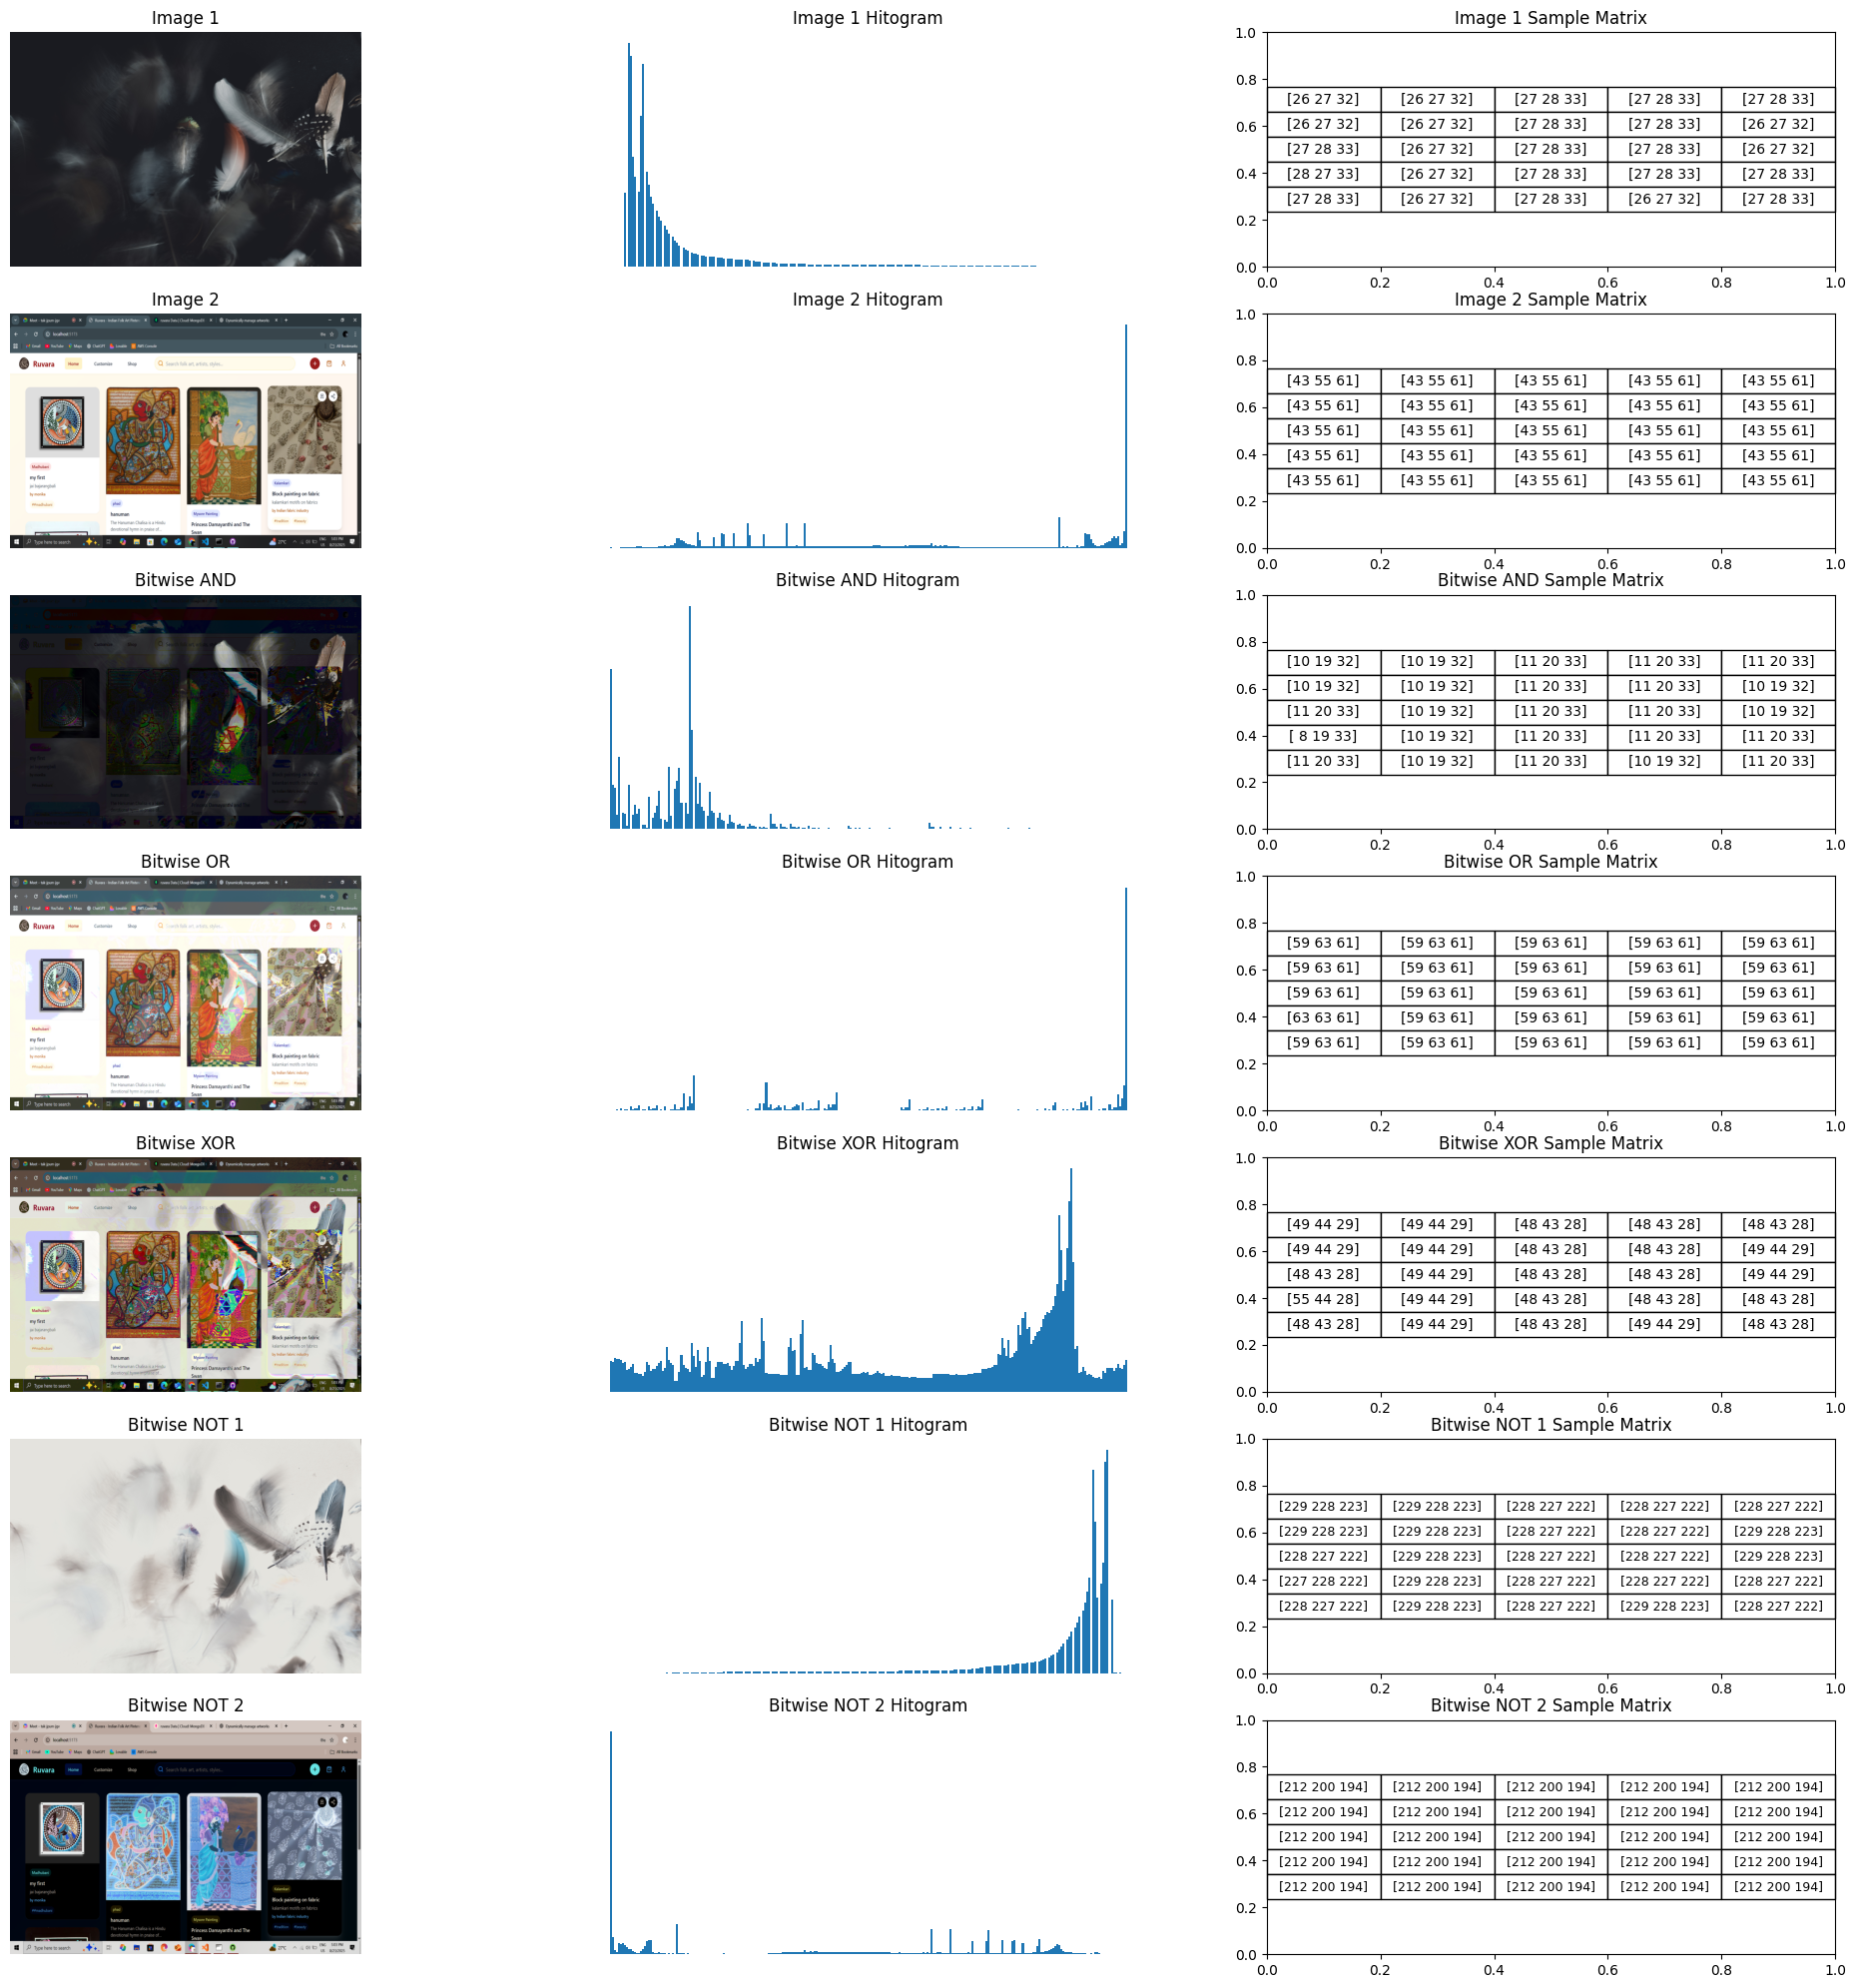

In [4]:
if img1.shape!=img2.shape:
    img2=cv2.resize(img2,(img1.shape[1],img1.shape[0]))
andop=cv2.bitwise_and(img1,img2)
orop=cv2.bitwise_or(img1,img2)
xorop=cv2.bitwise_xor(img1,img2)
notop1=cv2.bitwise_not(img1)
notop2=cv2.bitwise_not(img2)
images=[img1,img2,andop,orop,xorop,notop1,notop2]
titles=['Image 1','Image 2','Bitwise AND','Bitwise OR','Bitwise XOR','Bitwise NOT 1','Bitwise NOT 2']
plt.figure(figsize=(25,25))
for i,(image,title,cmap,hcol) in enumerate(zip(images,titles,cmaps,hcols)):
    plt.subplot(7,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(7,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:5,:5]
    plt.subplot(7,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1616\1040527599.py:4: RuntimeWarning: divide by zero encountered in log
  log=np.uint8(255*(np.log(1+grayimg)/np.log(1+maxint)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1616\1040527599.py:4: RuntimeWarning: overflow encountered in scalar add
  log=np.uint8(255*(np.log(1+grayimg)/np.log(1+maxint)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1616\1040527599.py:4: RuntimeWarning: invalid value encountered in divide
  log=np.uint8(255*(np.log(1+grayimg)/np.log(1+maxint)))
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1616\1040527599.py:4: RuntimeWarning: invalid value encountered in cast
  log=np.uint8(255*(np.log(1+grayimg)/np.log(1+maxint)))


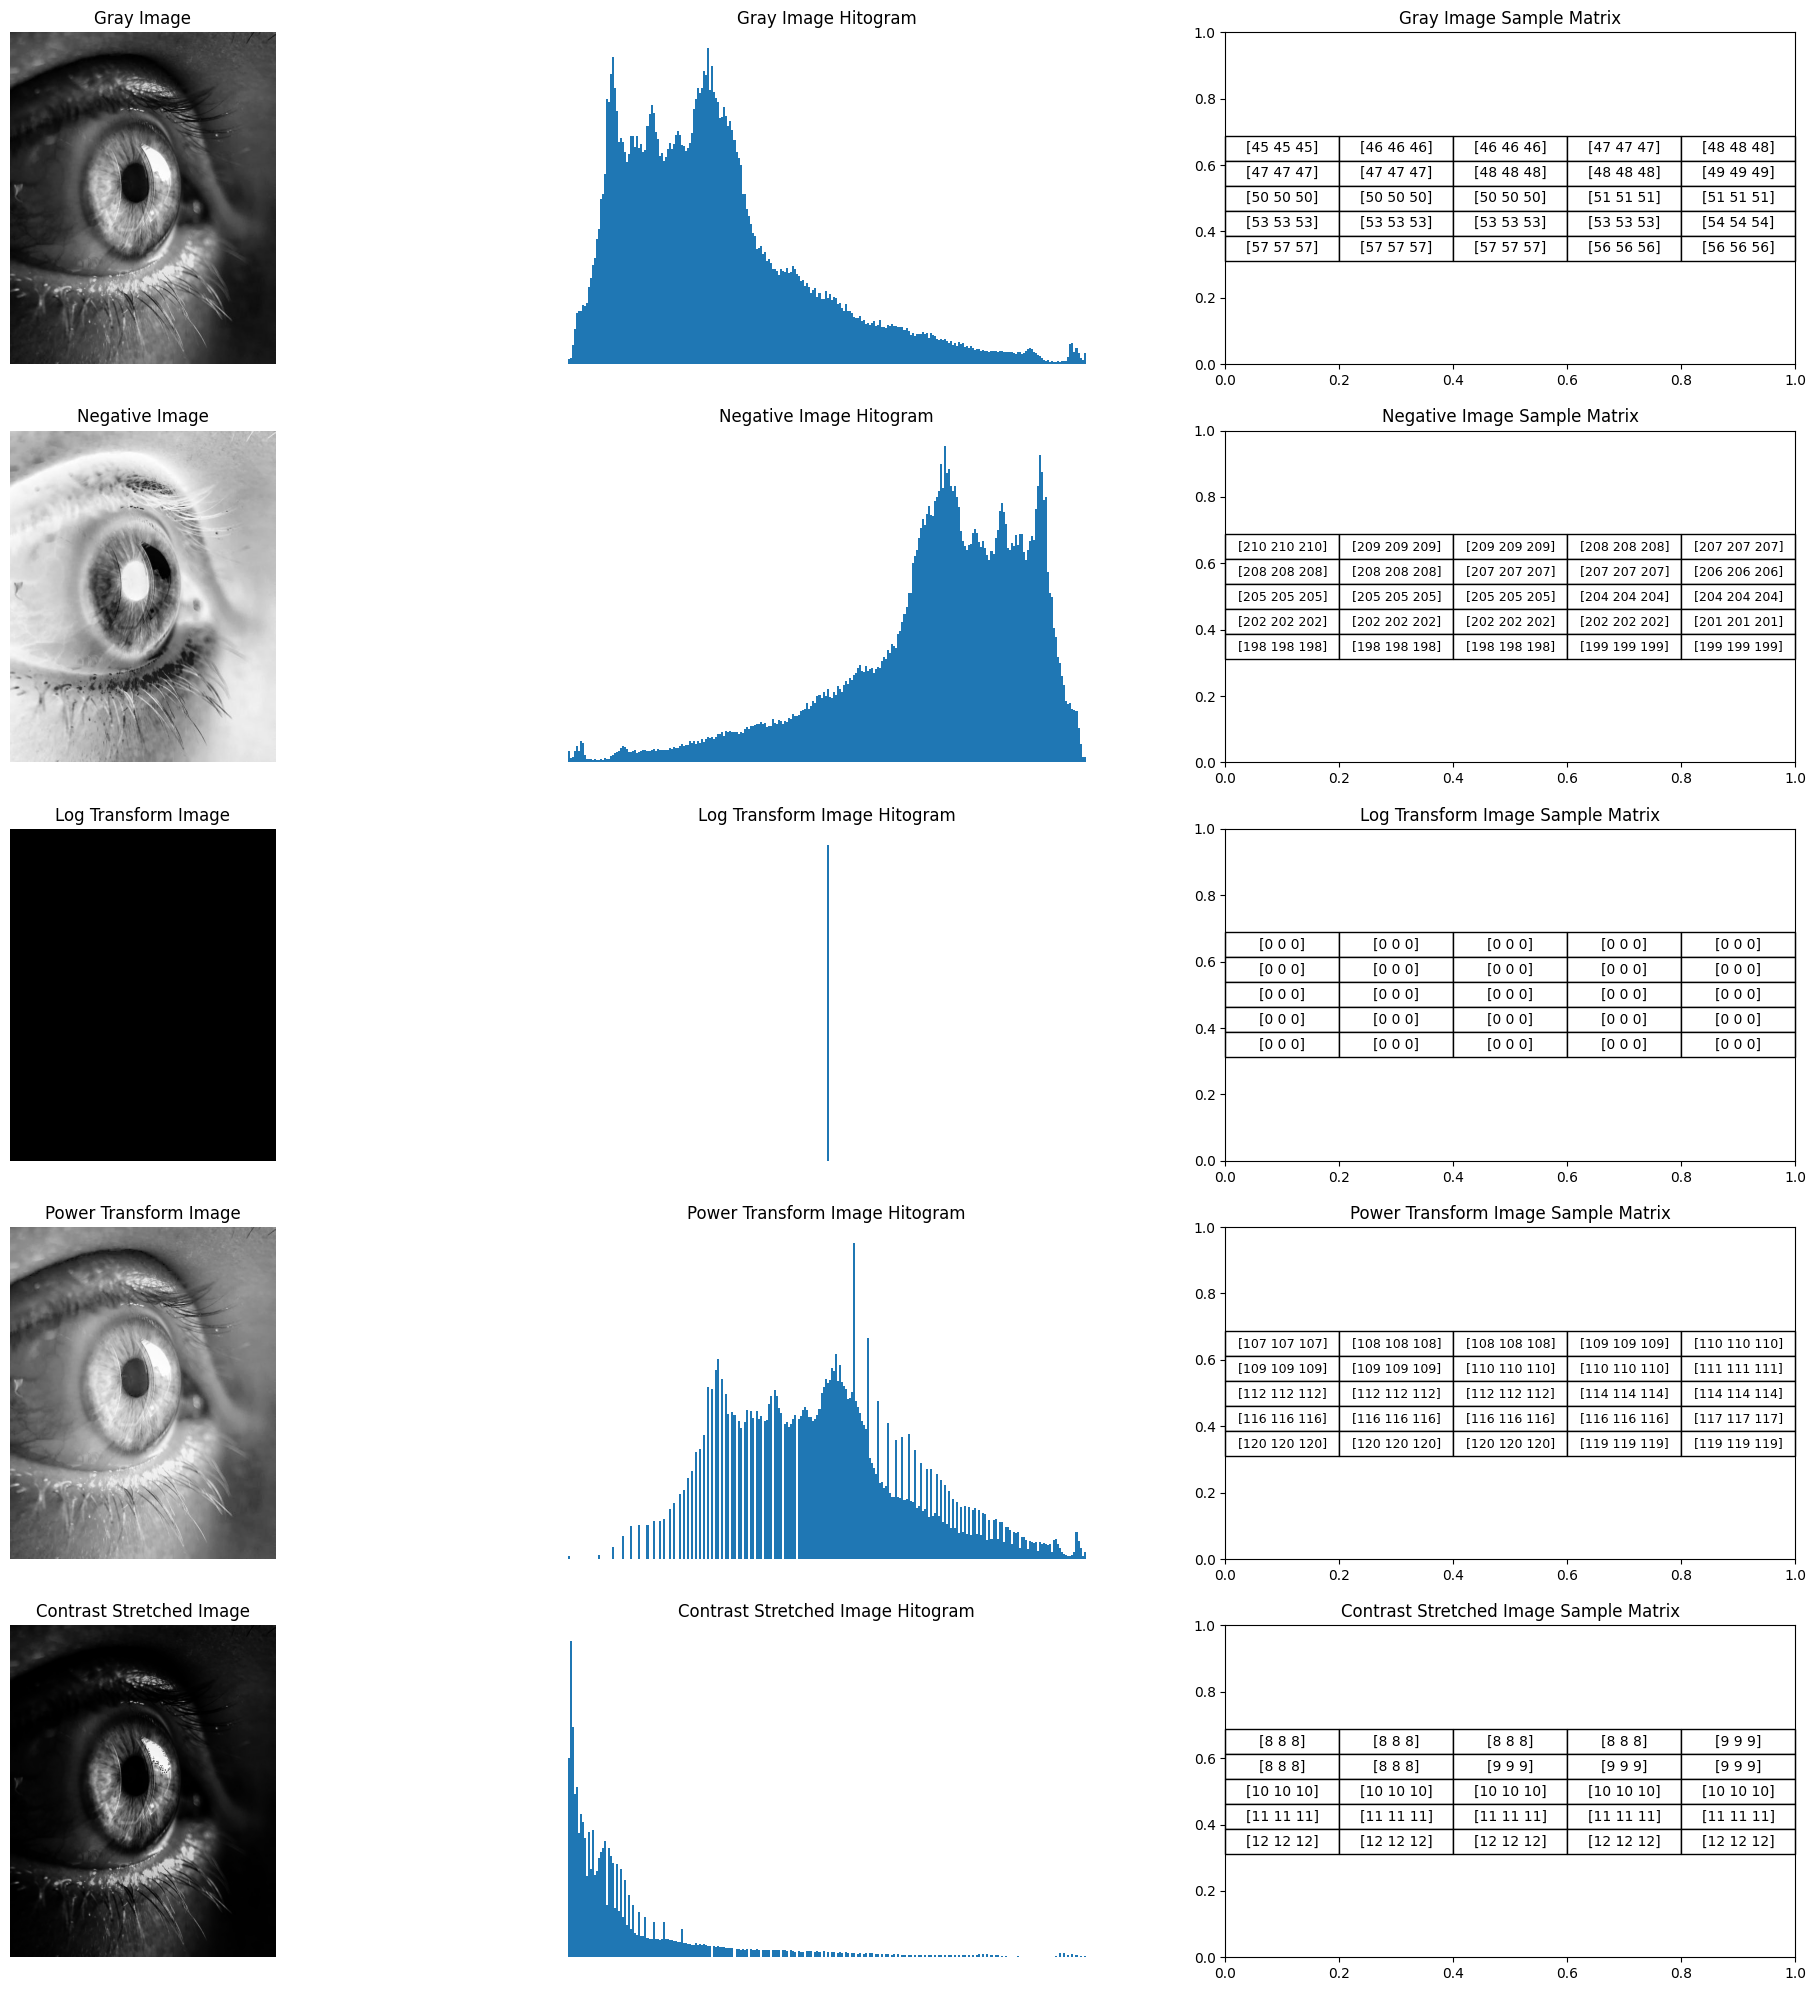

In [5]:
negative=255-grayimg
maxint=np.max(grayimg)
minint=np.min(grayimg)
log=np.uint8(255*(np.log(1+grayimg)/np.log(1+maxint)))
power=np.uint8(255*np.power(grayimg/float(maxint),0.5))
cont=np.uint8((grayimg-maxint)*(grayimg/(maxint-minint)))
images=[grayimg,negative,log,power,cont]
titles=['Gray Image','Negative Image','Log Transform Image','Power Transform Image','Contrast Stretched Image']
plt.figure(figsize=(25,25))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(5,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image)
    plt.subplot(5,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:5,:5]
    plt.subplot(5,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

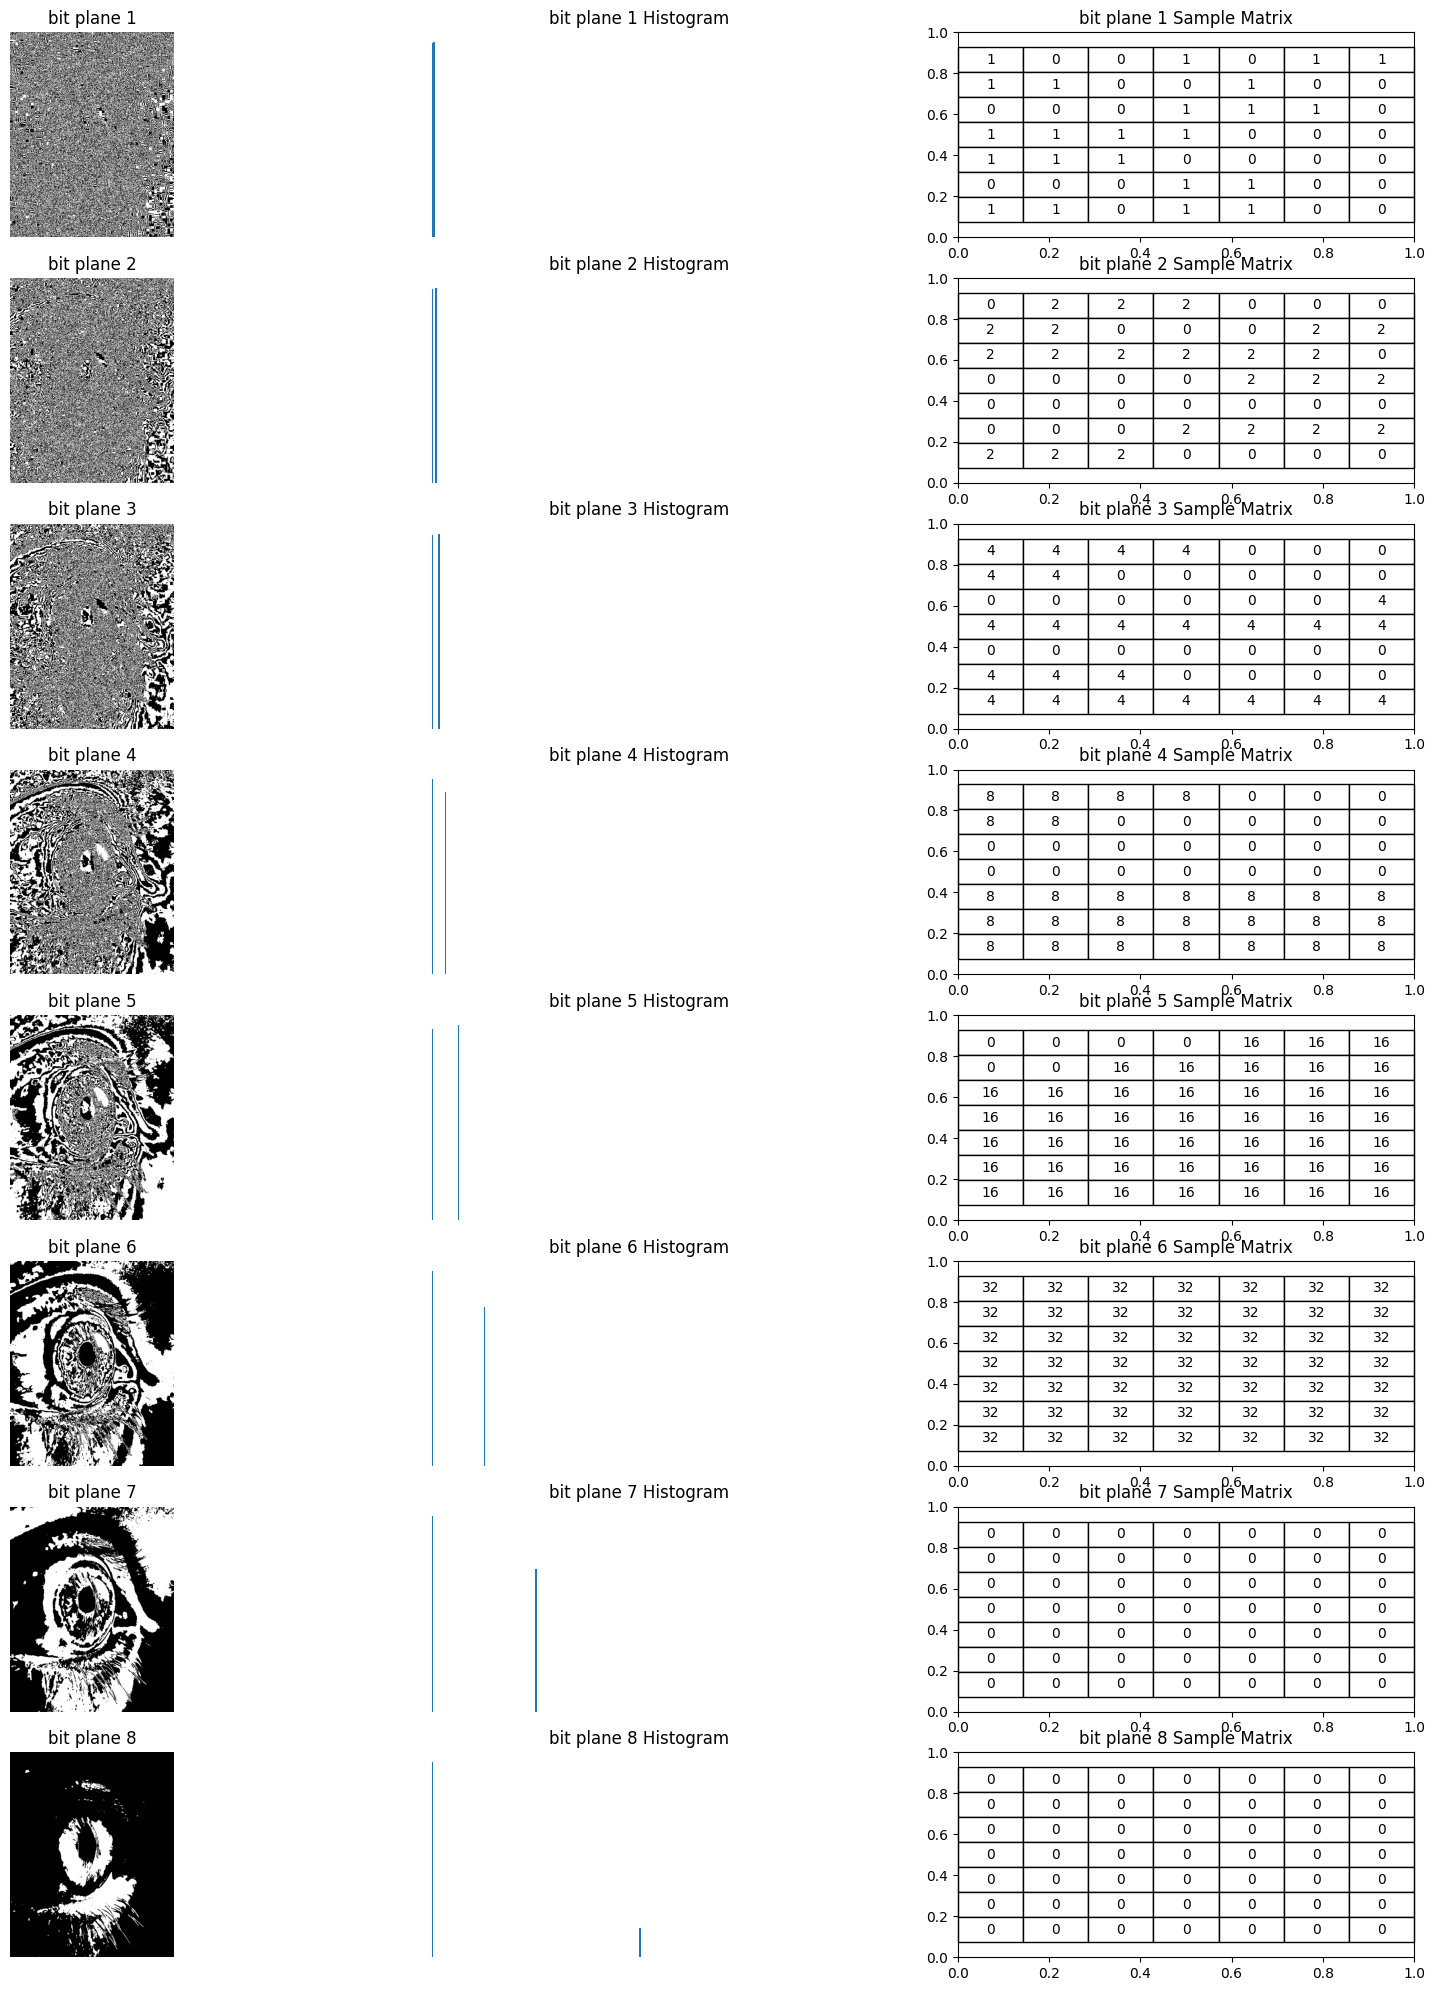

In [6]:
grayimg=cv2.imread('grayimage.jpeg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(20,25))
for i in range(8):
    plane=cv2.bitwise_and(grayimg,2**i)
    plt.subplot(8,3,3*i+1)
    plt.title(f'bit plane {i+1}')
    plt.axis('off')
    plt.imshow(plane,cmap='gray')
    plt.subplot(8,3,3*i+2)
    plt.title(f'bit plane {i+1} Histogram')
    plt.axis('off')
    plt.hist(plane.ravel(),256,(0,256))
    matrix=plane[:7,:7]
    plt.subplot(8,3,3*i+3)
    plt.title(f'bit plane {i+1} Sample Matrix')
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

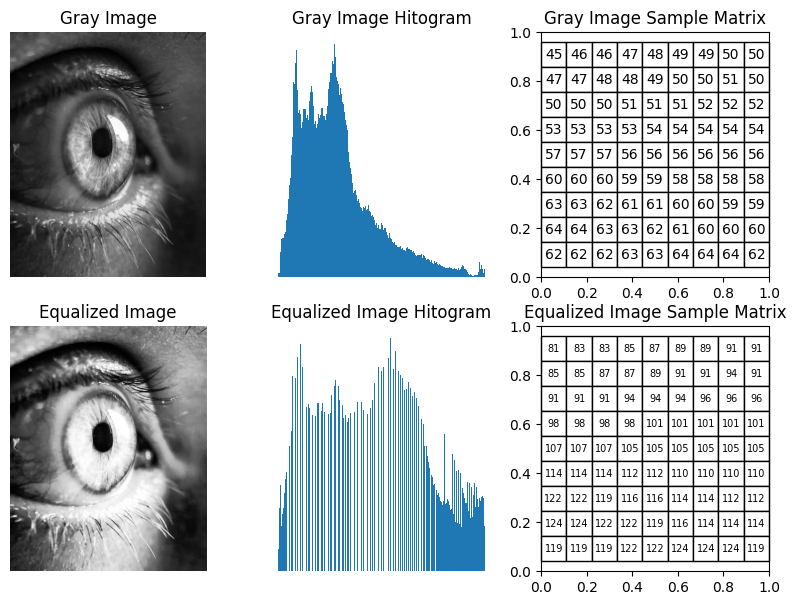

In [7]:
grayimg=cv2.imread('grayimage.jpeg',cv2.IMREAD_GRAYSCALE)
equalize=cv2.equalizeHist(grayimg)
images=[grayimg,equalize]
titles=['Gray Image','Equalized Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

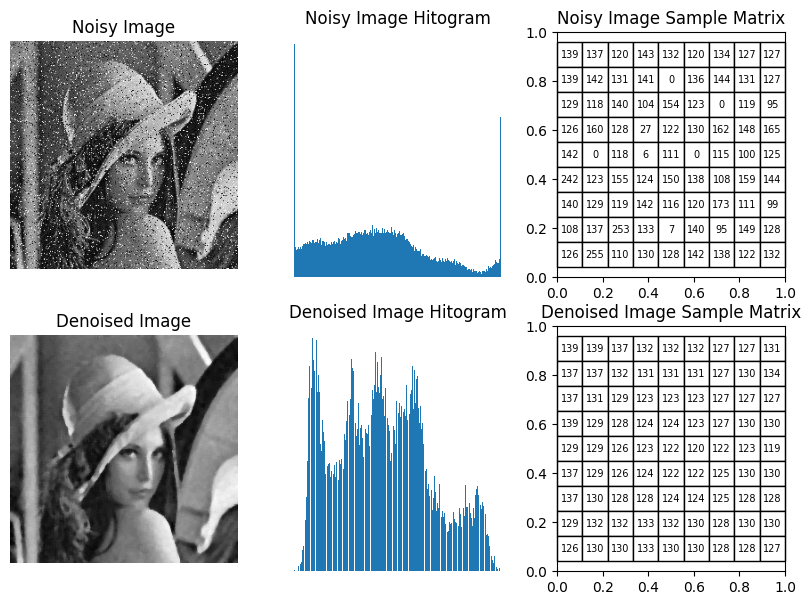

In [8]:
def denoise_image(img):
    return cv2.medianBlur(img,5)
images=[noisyimg,denoise_image(noisyimg)]
titles=['Noisy Image','Denoised Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

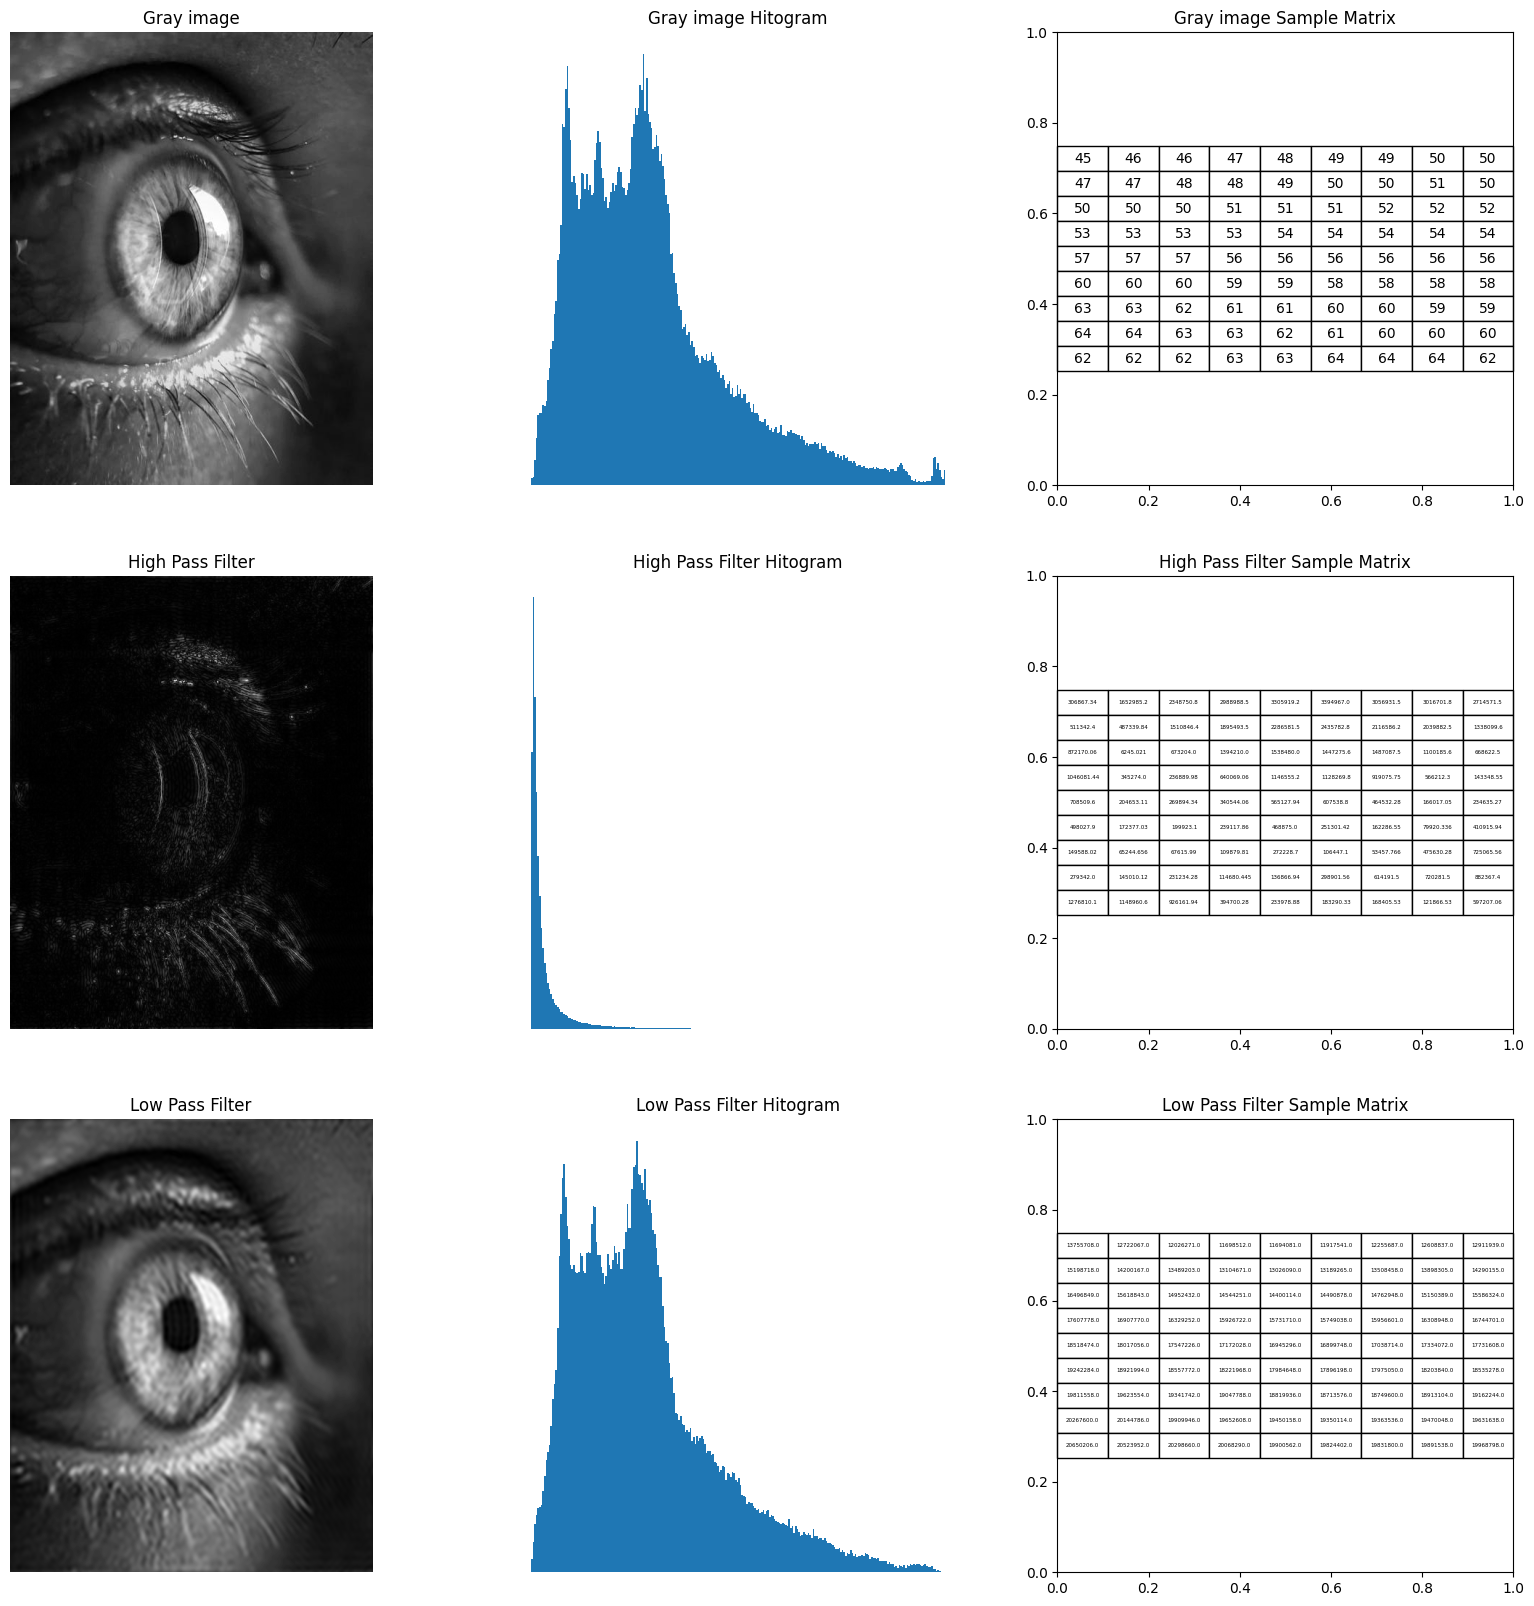

In [9]:
def apply_filter(image,cutoff,ishigh):
    rows,cols=image.shape
    crow,ccol=rows//2,cols//2
    dft_shift=cv2.dft(np.float32(image),flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_fftshift=np.fft.fftshift(dft_shift)
    mask=np.zeros((rows,cols,2),np.uint8) if not ishigh else np.ones((rows,cols,2),np.uint8)
    mask[crow-cutoff:crow+cutoff,ccol-cutoff:ccol+cutoff]=1 if not ishigh else 0
    filtered=dft_fftshift*mask
    ifft=np.fft.ifftshift(filtered)
    idft=cv2.idft(ifft)
    fil=cv2.magnitude(idft[:,:,0],idft[:,:,1])
    return fil
grayimg=cv2.imread('grayimage.jpeg',cv2.COLOR_BGR2GRAY)
grayimg=cv2.cvtColor(grayimg,cv2.COLOR_BGR2GRAY)
images=[grayimg,apply_filter(grayimg,50,True),apply_filter(grayimg,50,False)]
titles=['Gray image','High Pass Filter','Low Pass Filter']
plt.figure(figsize=(20,20))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(3,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(3,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(3,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

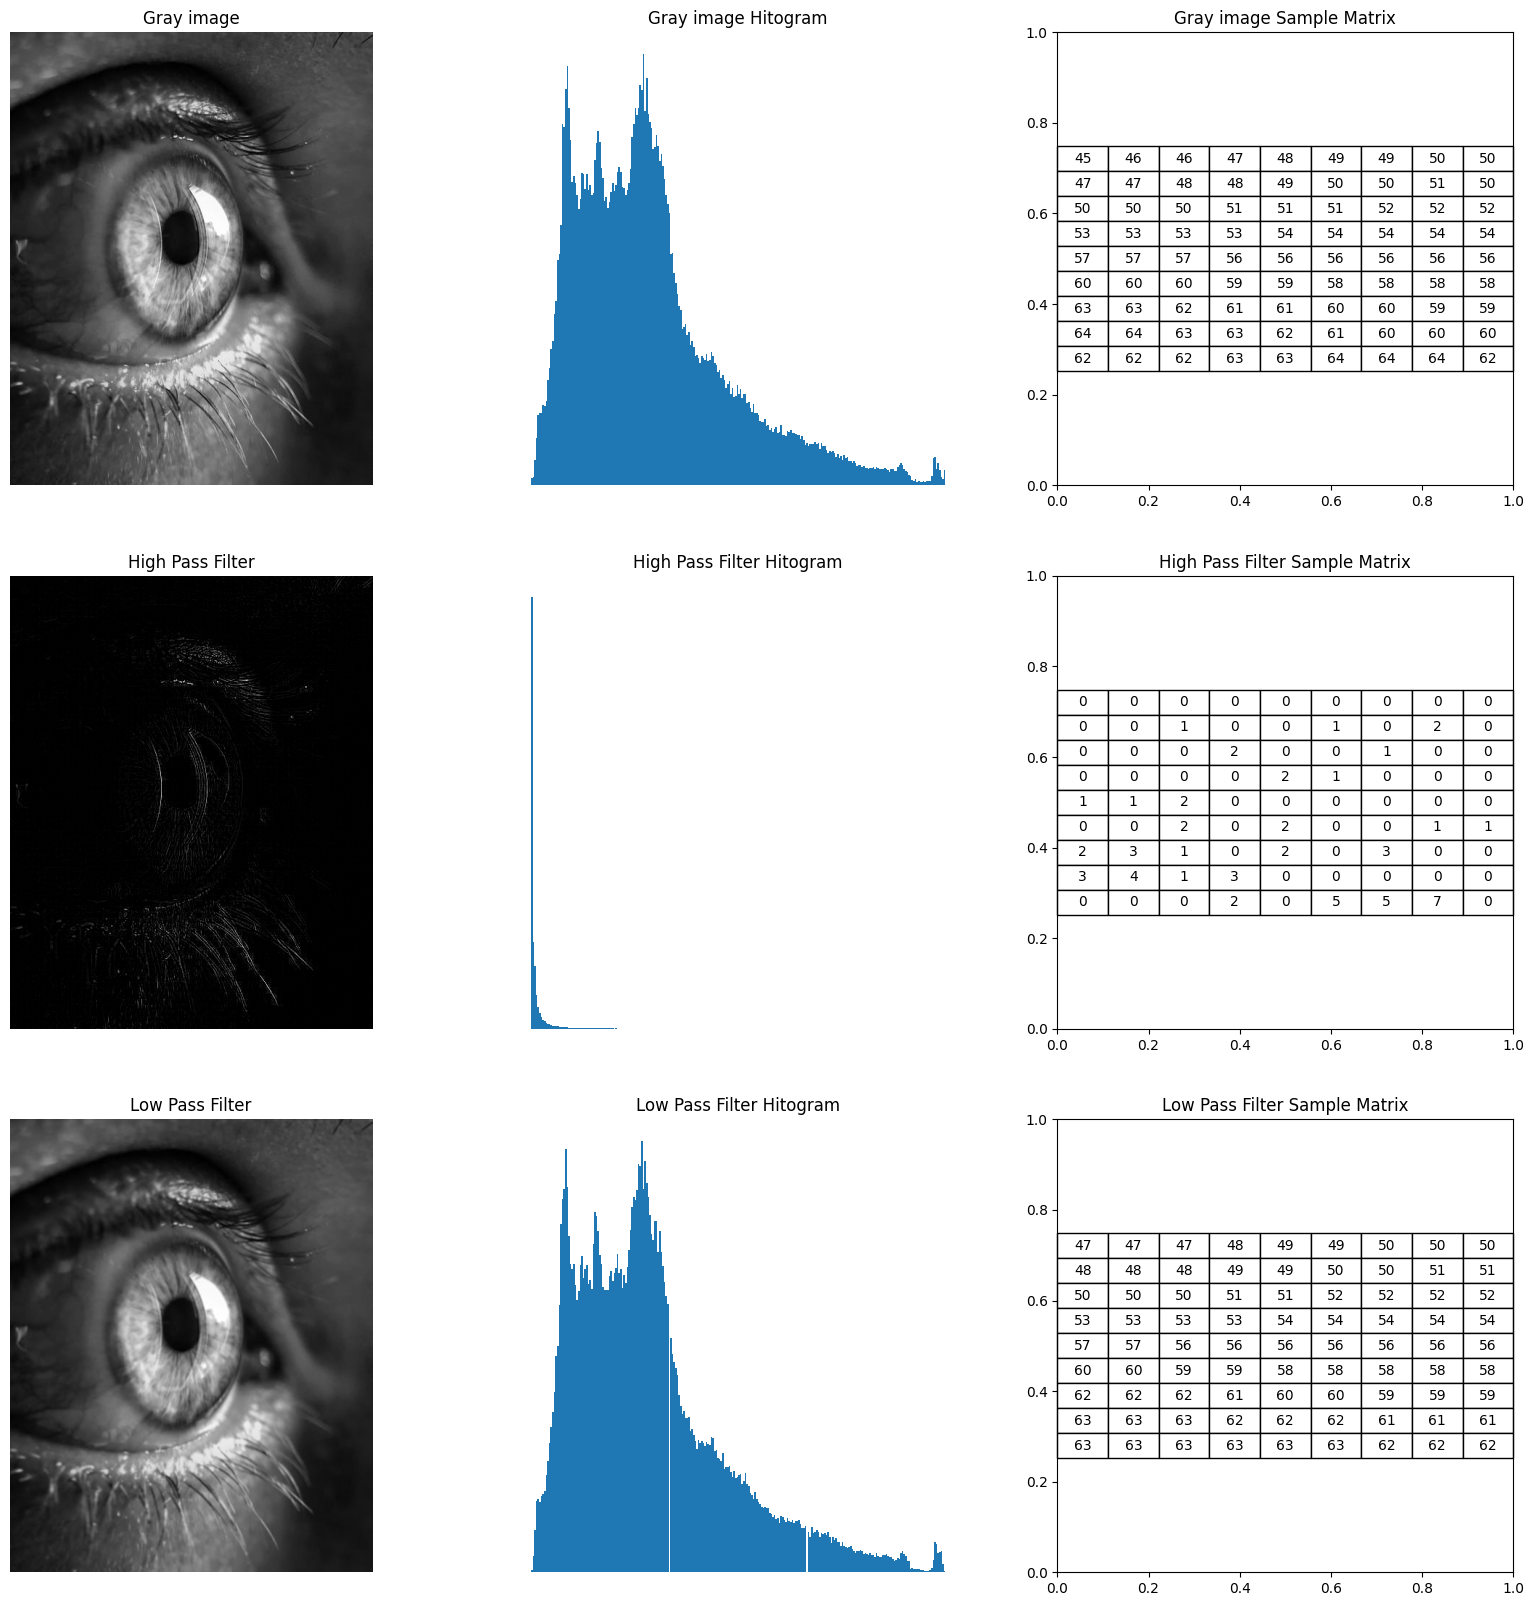

In [10]:
kernellp=np.ones((3,3),np.uint8)/9
kernelhp=np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
images=[grayimg,cv2.filter2D(grayimg,-1,kernelhp),cv2.filter2D(grayimg,-1,kernellp)]
titles=['Gray image','High Pass Filter','Low Pass Filter']
plt.figure(figsize=(20,20))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(3,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(3,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(3,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

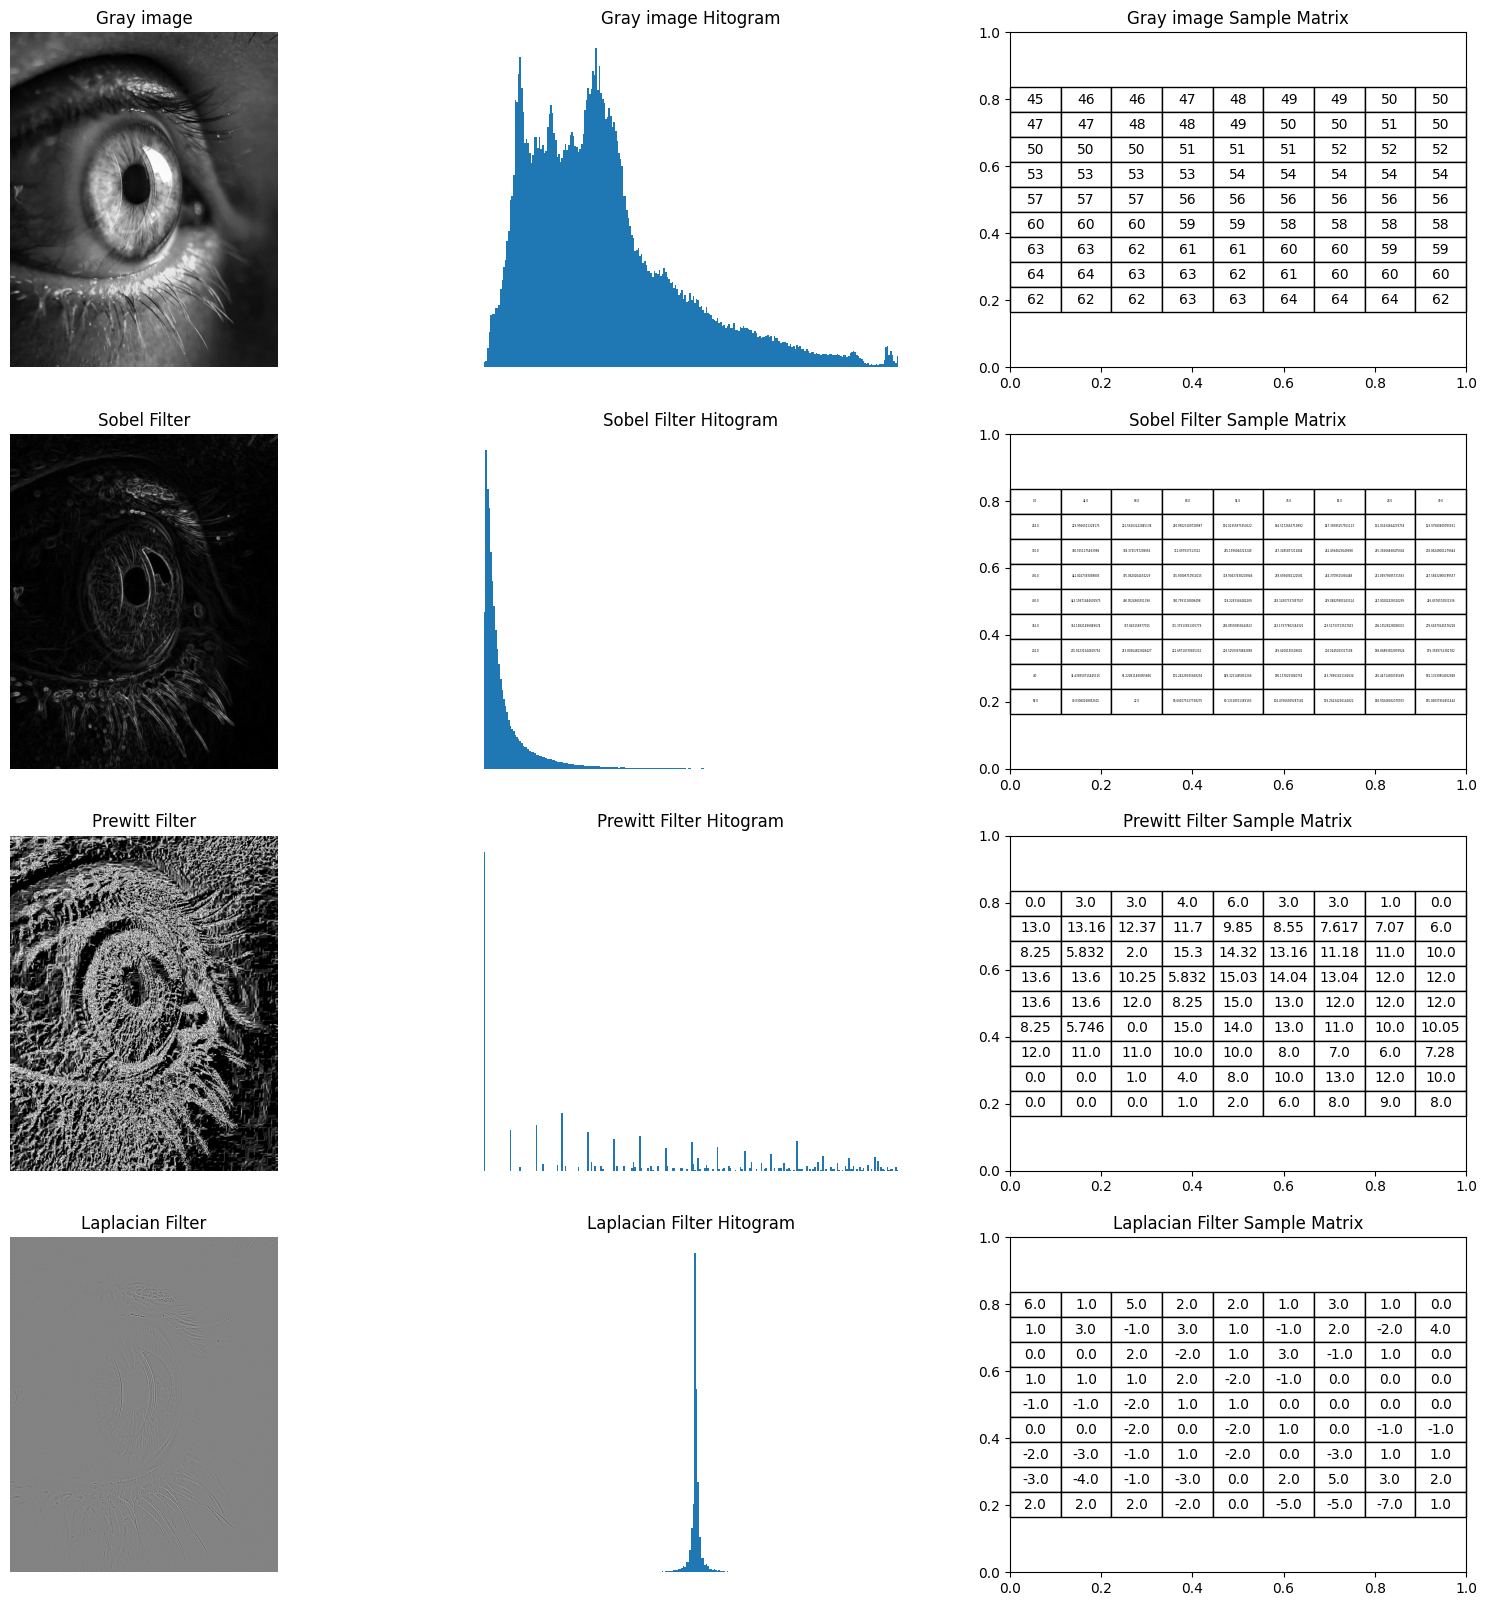

In [11]:
sobelx=cv2.Sobel(grayimg,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(grayimg,cv2.CV_64F,0,1,ksize=5)
sobel=np.sqrt(sobelx**2+sobely**2)
kernelx=np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
kernely=np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
prewittx=cv2.filter2D(grayimg,-1,kernelx)
prewitty=cv2.filter2D(grayimg,-1,kernely)
prewitt=np.sqrt(prewittx**2+prewitty**2)
laplacian=cv2.Laplacian(grayimg,cv2.CV_64F)
images=[grayimg,sobel,prewitt,laplacian]
titles=['Gray image','Sobel Filter','Prewitt Filter','Laplacian Filter']
plt.figure(figsize=(20,20))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(4,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(4,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(4,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

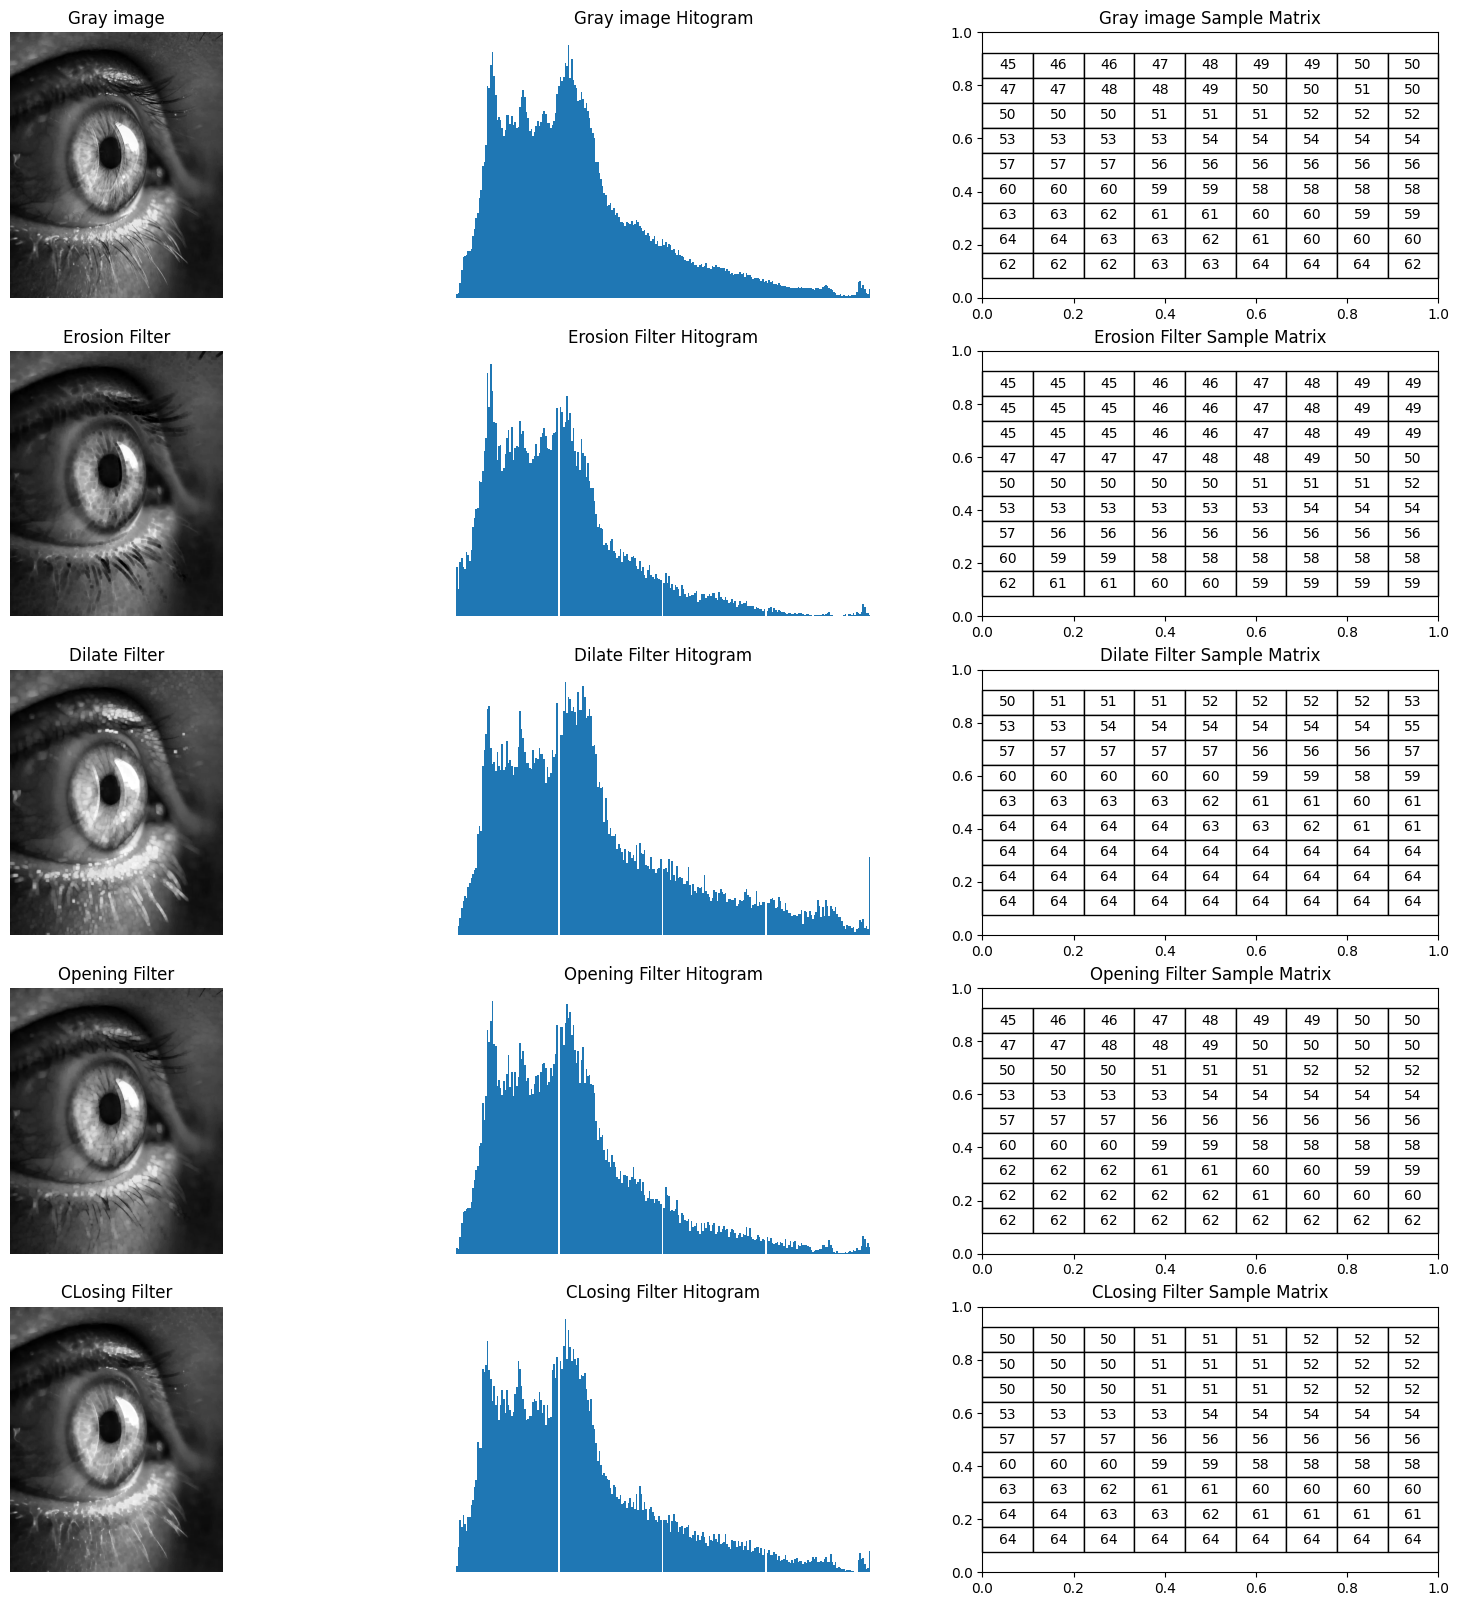

In [12]:
kernel=np.ones((5,5),np.uint8)
erode=cv2.erode(grayimg,kernel,iterations=1)
dilate=cv2.dilate(grayimg,kernel,iterations=1)
openm=cv2.morphologyEx(grayimg,cv2.MORPH_OPEN,kernel)
closem=cv2.morphologyEx(grayimg,cv2.MORPH_CLOSE,kernel)
images=[grayimg,erode,dilate,openm,closem]
titles=['Gray image','Erosion Filter','Dilate Filter','Opening Filter','CLosing Filter']
plt.figure(figsize=(20,20))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(5,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(5,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(5,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

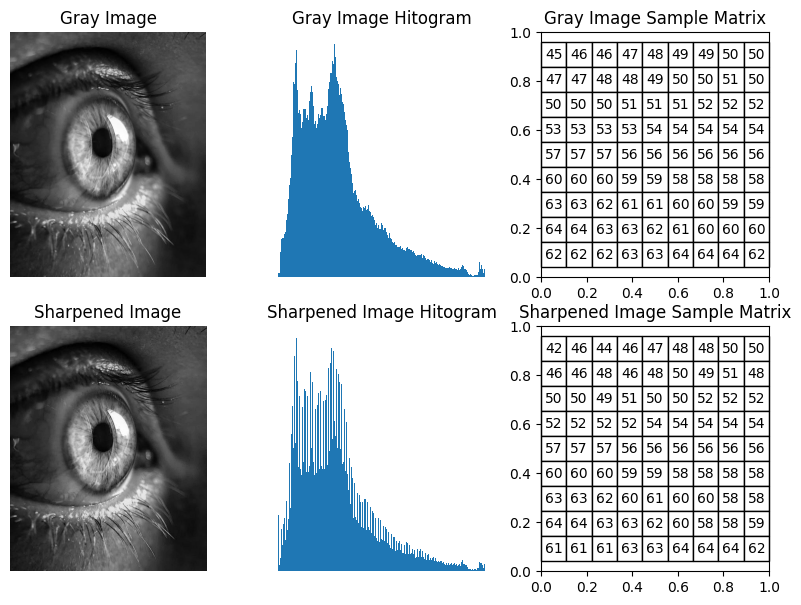

In [14]:
def sharpen_image(image):
    laplacian=np.array([[0,1,0],[1,-4,1],[0,1,0]])
    filterimage=cv2.filter2D(image,-1,laplacian)
    return cv2.addWeighted(image,1,filterimage,-0.5,0)
images=[grayimg,sharpen_image(grayimg)]
titles=['Gray Image','Sharpened Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

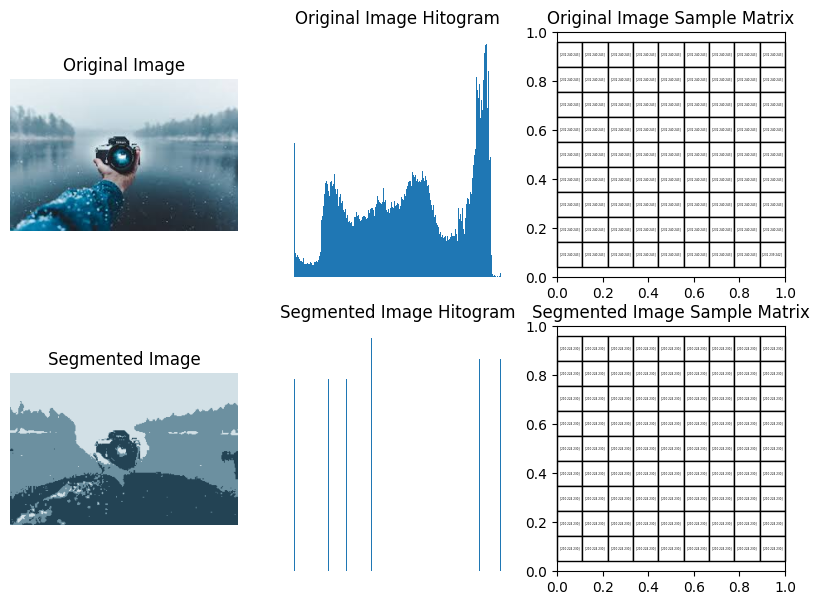

In [27]:
image=cv2.imread('images.jfif',cv2.COLOR_BGR2RGB)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
pixels=np.float32(image.reshape(-1,3))
criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
_,label,center=cv2.kmeans(pixels,3,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
center=np.uint8(center)
segmentedimg=center[label.flatten()].reshape(image.shape)
images=[image,segmentedimg]
titles=['Original Image','Segmented Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

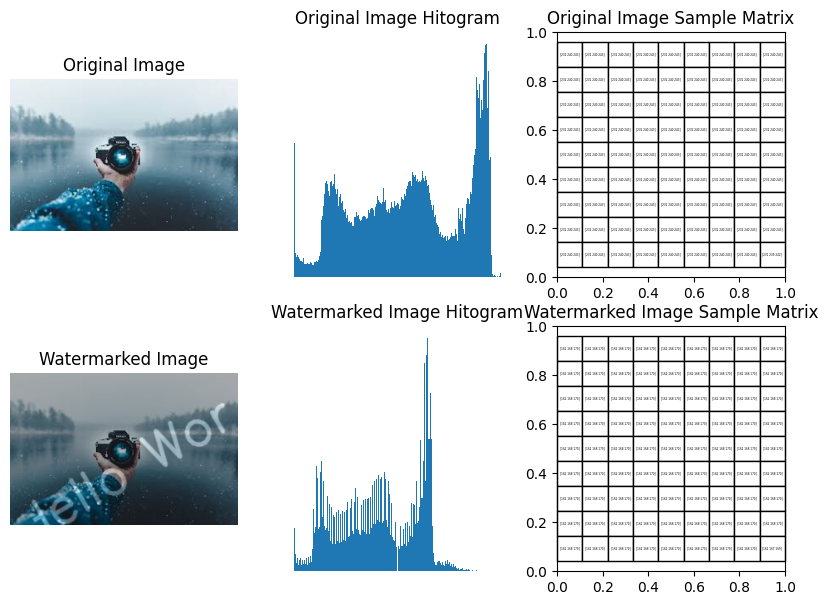

In [38]:
image=cv2.imread('images.jfif')
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
h,w=image.shape[:2]
overlay=np.zeros_like(image)
font=cv2.FONT_ITALIC
color=(256,256,256)
scale=2
thick=3
overlayed=cv2.putText(overlay,'Hello World',(x,y),font,scale,color,thick,cv2.LINE_AA)
rotated=cv2.warpAffine(overlayed,cv2.getRotationMatrix2D((w//2,h//2,),30,1),(w,h))
watermarked=cv2.addWeighted(rotated,0.3,image,0.7,0)
images=[image,watermarked]
titles=['Original Image','Watermarked Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

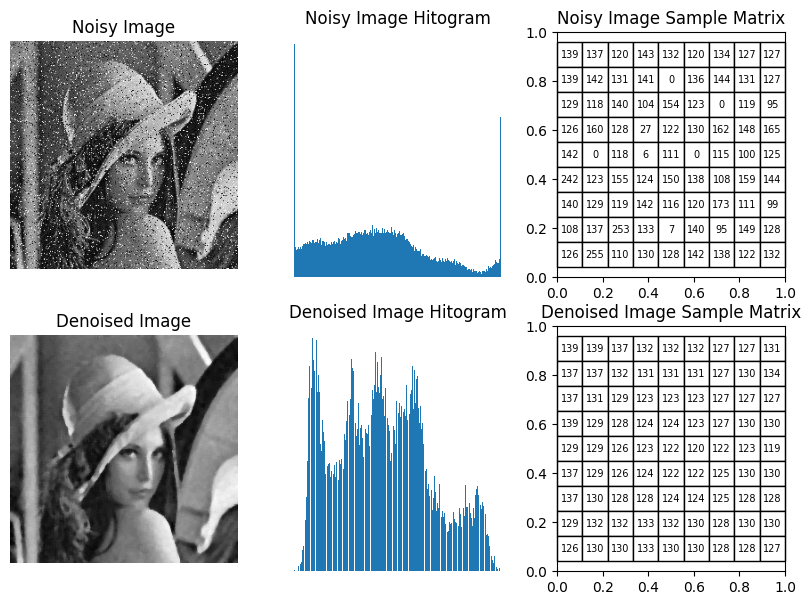

In [15]:
denoisedimg=cv2.medianBlur(noisyimg,5)
images=[noisyimg,denoisedimg]
titles=['Noisy Image','Denoised Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

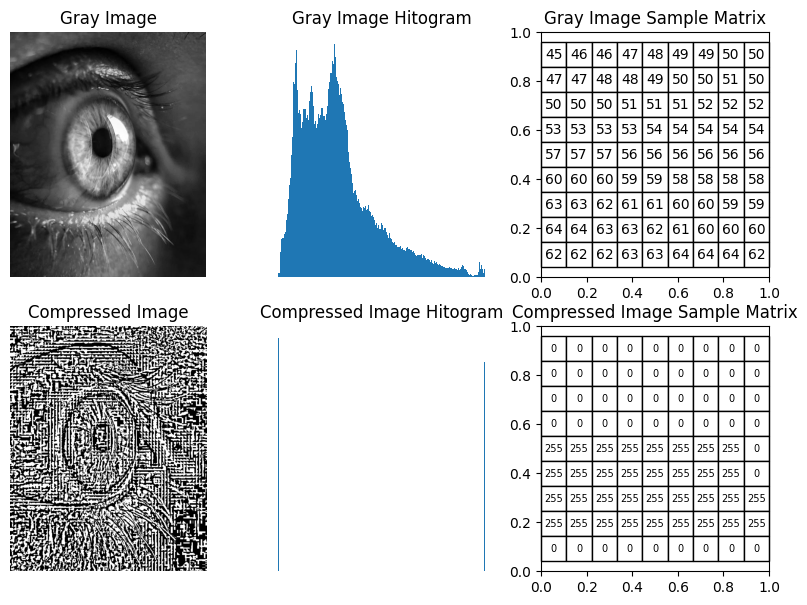

In [18]:
def block_coding(image,blocksize=8):
    h,w=image.shape
    compimg=np.zeros_like(image)
    for i in range(0,h,blocksize):
        for j in range(0,w,blocksize):
            block=image[i:i+blocksize,j:j+blocksize]
            mean=np.mean(block)
            compblock=np.where(block<=mean,0,255)
            compimg[i:i+blocksize,j:j+blocksize]=compblock
    return compimg
images=[grayimg,block_coding(grayimg)]
titles=['Gray Image','Compressed Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)

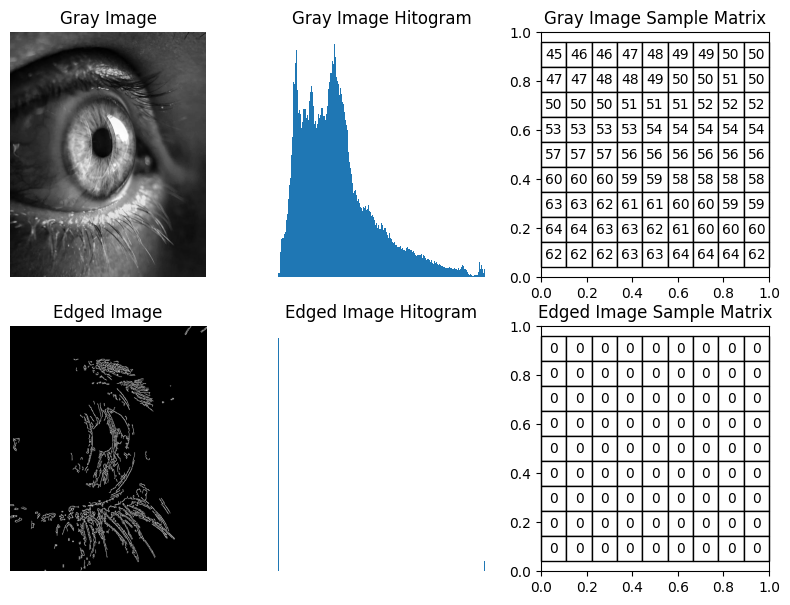

In [19]:
edges=cv2.Canny(grayimg,100,200)
images=[grayimg,edges]
titles=['Gray Image','Edged Image']
plt.figure(figsize=(10,7))
for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(2,3,3*i+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(image,cmap='gray')
    plt.subplot(2,3,3*i+2)
    tit=f'{title} Hitogram'
    plt.title(tit)
    plt.axis('off')
    plt.hist(image.ravel(),bins=256)
    matrix=image[:9,:9]
    plt.subplot(2,3,3*i+3)
    tit=f'{title} Sample Matrix'
    plt.title(tit)
    table=plt.table(cellText=matrix,loc='center',cellLoc='center')
    table.scale(1,1.5)